# Motivation

THIS IS DRAFT STILL

This project will investigate car crashes and collisions in New York City. Compared to other first world countries the US has a very high rate of car crashes and car related injuries and deaths. Influential factors are speeding, drunk driving and texting while driving[ref].
New York City is the most populous city in the US and NYC OpenData has published a dataset of police registered car collisions in the city. The data dates back to mid 2012 and it contains over 1 million incidents in a total of 226 MB. The data has 29 columns and contain information about:

Location, 
time and date,
injuries and deaths,
involved parties
factors leading to the accident

The reason for choosing this dataset was…


The goal for this project is to be able to provide the end user with some guidance when driving in NYC. He should be able to identify:

Unsafe areas

areas where he should be aware for certain types of car crashes

In [1]:
import csv
from pylab import *
from pandas import *
import geoplotlib
from geoplotlib.utils import BoundingBox
from collections import Counter
import operator
import numpy as np
from __future__ import division
from sklearn import cluster
from scipy import stats
from matplotlib import pyplot as plt

In [2]:
#open dataset with pandas
c_data = read_csv('NYPD_Motor_Vehicle_Collisions.csv', low_memory=False)
c_data.columns = [c.replace(' ', '_') for c in c_data.columns]

In [3]:
len(c_data)

1007130

In [4]:
c_data.head()

DATE  TIME   BOROUGH ZIP_CODE   LATITUDE  LONGITUDE  \
0  03/31/2017  0:00       NaN      NaN  40.645615  -73.90990   
1  03/31/2017  0:00       NaN      NaN  40.762737  -73.83951   
2  03/31/2017  0:00  BROOKLYN    11203  40.658478  -73.92818   
3  03/31/2017  0:00  BROOKLYN    11235  40.580360  -73.96761   
4  03/31/2017  0:00       NaN      NaN  40.845180  -73.91417   

                 LOCATION                    ON_STREET_NAME CROSS_STREET_NAME  \
0   (40.645615, -73.9099)  FOSTER AVENUE                                  NaN   
1  (40.762737, -73.83951)                               NaN               NaN   
2  (40.658478, -73.92818)  EAST 53 STREET                     WINTHROP STREET   
3   (40.58036, -73.96761)  NEPTUNE AVENUE                       OCEAN PARKWAY   
4   (40.84518, -73.91417)  JEROME AVENUE                                  NaN   

  OFF_STREET_NAME         ...           CONTRIBUTING_FACTOR_VEHICLE_2  \
0             NaN         ...          Driver Inattention/Distraction   
1             NaN         ...                             Unspecified   
2             NaN         ...                                     NaN   
3             NaN         ...                                     NaN   
4             NaN         ...                         Other Vehicular   

   CONTRIBUTING_FACTOR_VEHICLE_3  CONTRIBUTING_FACTOR_VEHICLE_4  \
0                            NaN                            NaN   
1                            NaN                            NaN   
2                            NaN                            NaN   
3                            NaN                            NaN   
4                            NaN                            NaN   

   CONTRIBUTING_FACTOR_VEHICLE_5  UNIQUE_KEY            VEHICLE_TYPE_CODE_1  \
0                            NaN     3643404              PASSENGER VEHICLE   
1                            NaN     3643942  SPORT UTILITY / STATION WAGON   
2                            NaN     3643587  SPORT UTILITY / STATION WAGON   
3                            NaN     3643847                            NaN   
4                            NaN     3642657              PASSENGER VEHICLE   

             VEHICLE_TYPE_CODE_2  VEHICLE_TYPE_CODE_3 VEHICLE_TYPE_CODE_4  \
0              PASSENGER VEHICLE                  NaN                 NaN   
1              PASSENGER VEHICLE                  NaN                 NaN   
2                            NaN                  NaN                 NaN   
3                            NaN                  NaN                 NaN   
4  SPORT UTILITY / STATION WAGON                  NaN                 NaN   

  VEHICLE_TYPE_CODE_5  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  

[5 rows x 29 columns]

# Data cleaning and preprocessing

When first looking at the dataset it became clear that not all cell of the dataset were filled out. The first step was therefore to figure out what data was missing in the dataset and whether this issue could be bypassed. We start by only selecting the columns we are gonna use for the project. We then remove all the rows with one or more empty cells.

In [5]:
#add other columns we might use !!!!!
c_data = c_data[["LONGITUDE", "LATITUDE", "CONTRIBUTING_FACTOR_VEHICLE_1", "NUMBER_OF_PERSONS_INJURED", "TIME"]]
c_data=c_data.dropna(how='any')
len(c_data)

801398

We can see from the length of the dataset that about 200.000 entries were removed here. When looking at the head of the dataset we see that one of the factors defined for CONTRIBUTING_FACTOR_VEHICLE is ‘Unspecified’. Next step we will figure out how many entries the dataset contains, in which the factor has not been noted.

In [6]:
temp_data = c_data[c_data.CONTRIBUTING_FACTOR_VEHICLE_1 == 'Unspecified']
len(temp_data)

417798

We see that for over half a million of the data entries the cause of the accident has not been specified. It is of course inconvenient that so many of the collisions are unspecified but the remaining data should be sufficient to work with. It should also be noted that even though so many of the crashes are unspecified, they can still be used to some extend. The data can still be use for calculations where the factor leading to the accident is not relevant. A final step to remember is removing entries, which geodata is not in NYC. 

In [7]:
print 'min longitude:',min(c_data.LONGITUDE),'max longitude:' , max(c_data.LONGITUDE)
print 'min latitude:',min(c_data.LATITUDE),'max latitude:' , max(c_data.LATITUDE)

min longitude: -201.35999 max longitude: 0.0
min latitude: 0.0 max latitude: 40.912884


From the data we can check that the longitude and latitude of NYC should be around 40.5 and -74 we can therefore set some boundaries around these numbers to get rid of the outliers.

In [8]:
c_data = c_data[(np.abs(stats.zscore(c_data[['LATITUDE']])) < 39 ).all(axis=1)]
#FIX RHIS SHIT!!!!
c_data = c_data[(np.abs(stats.zscore(c_data[['LONGITUDE']])) < 3.257).all(axis=1)]
len(c_data)

801362

In [9]:
print 'min longitude:',min(c_data.LONGITUDE),'max longitude:' , max(c_data.LONGITUDE)
print 'min latitude:',min(c_data.LATITUDE),'max latitude:' , max(c_data.LATITUDE)

min longitude: -74.742 max longitude: -73.7005968
min latitude: 40.4989488 max latitude: 40.912884


Now we get some minimum and maximum values that fit better with the longitudes and latitudes of NYC.

# Stats of the dataset

In this section we will start to dig into the dataset and look at general tendencies and xxxx. This can reveal general aspects of the data we are working with and help get a better understanding of it. We will start out by looking at the factors leading to these crashes and collisions and seeing which ones are most frequent.

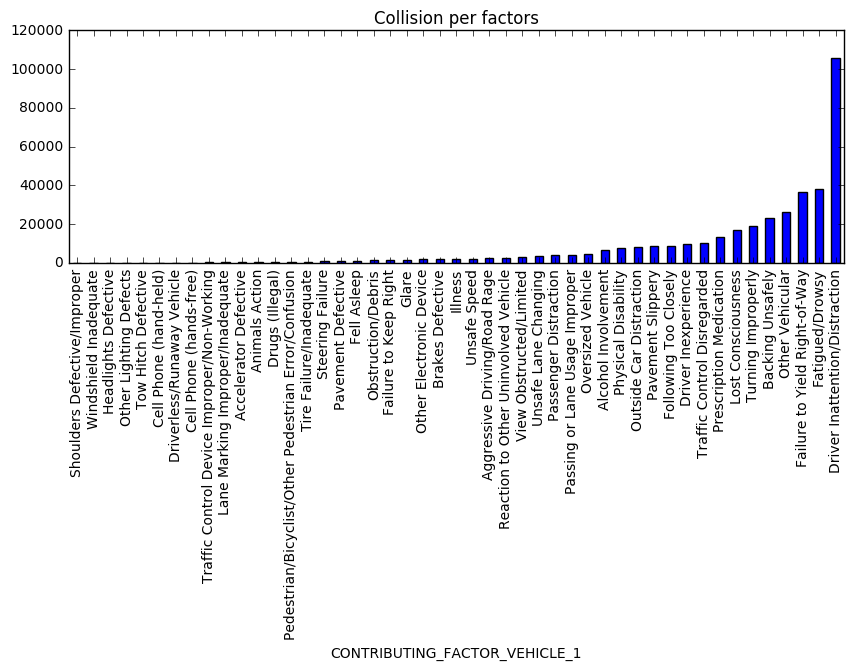

In [10]:
c_data_totals = c_data.groupby(['CONTRIBUTING_FACTOR_VEHICLE_1']).size()
c_data_totals = c_data_totals.drop('Unspecified')
c_data_totals = c_data_totals.sort_values()
c_data_totals.plot(kind='bar', title = 'Collision per factors', figsize=(10,3))
plt.show()

We see there are a lot of different factors leading to car crashes and collisions. From the chart we can see that the most frequent reason is driver inattention / distraction which is far above the rest.

For further analysis we have chosen to narrow it down to five factors to focus on. These five factors have been chosen as:

- Alcohol involvement
- Turning improperly
- Fatigued / drowsy
- Unsafe speed
- Traffic Control Disregarded

They have been chosen because they xxxxxxxxxxxxxx

In [11]:
focus_factors = set(['Fatigued/Drowsy', 'Unsafe Speed',  'Turning Improperly', 'Traffic Control Disregarded', 'Alcohol Involvement'])

Next we will look a little further into the geodata and see blabxxxxxxxxxxxxxxxxxxxxx

In [12]:
geo_data_all = {"lat": [float(x) for x in list(c_data['LATITUDE'])],
                             "lon": [float(x) for x in list(c_data['LONGITUDE'])]}

In [13]:
max_lat, min_lat = max(geo_data_all['lat']), min(geo_data_all['lat'])
max_lon, min_lon = max(geo_data_all['lon']), min(geo_data_all['lon'])

In [14]:
bbox = BoundingBox(north=max_lat, west=min_lon, south=min_lat, east=max_lon)

In [15]:
geoplotlib.kde(geo_data_all, bw = 2, cmap='jet')
geoplotlib.set_bbox(bbox)
geoplotlib.inline()

('smallest non-zero count', 8.955579620337621e-09)
('max count:', 160.37287231912836)


It is quite clear that Manhattan is the place with most frequent crashes and collisions. This makes sense as it is the center of the city where the most cars are driving. We will try and zoom in on the center area of the city to better see the details of this area.

In [16]:
bbox_centrum = BoundingBox(north=40.78, west=-73.95, south=40.72, east=-73.93)
geoplotlib.kde(geo_data_all, bw = 2, cmap='jet')
geoplotlib.set_bbox(bbox_centrum)
geoplotlib.inline()

('smallest non-zero count', 8.9555796203376223e-08)
('max count:', 22.897532736277231)


FIGURE OUT THE NAME OF THE HIGHLIGHTED STREETS AND TALK ABOUT THIS

To look a little further at the geodata we will try and plot only for our chosen focus factors and see if they all follow the same trend as the overall data. 

In [17]:
geo_data_focus = {}
for f in focus_factors:
    temp_geo_data = {"lat": [float(x) for x in list(c_data[c_data['CONTRIBUTING_FACTOR_VEHICLE_1']==f]['LATITUDE'])],
                             "lon": [float(x) for x in list(c_data[c_data['CONTRIBUTING_FACTOR_VEHICLE_1']==f]['LONGITUDE'])]}
    geo_data_focus[f] = temp_geo_data

In [18]:
#plot a map for each factor
for f in focus_factors:
    print f
    geoplotlib.kde(geo_data_focus[f], bw = 2, cmap='jet')
    geoplotlib.set_bbox(bbox)
    geoplotlib.inline()

Traffic Control Disregarded
('smallest non-zero count', 4.4777898101688105e-09)
('max count:', 1.9751287468237657)


Unsafe Speed
('smallest non-zero count', 4.4777898101688105e-09)
('max count:', 0.36792188833339307)


Alcohol Involvement
('smallest non-zero count', 4.4777898101688105e-09)
('max count:', 0.924247404042701)


Turning Improperly
('smallest non-zero count', 4.4777898101688105e-09)
('max count:', 12.689335257948532)


Fatigued/Drowsy
('smallest non-zero count', 4.4777898101688105e-09)
('max count:', 12.720553057067514)


Looking at these plots we see some of the same tendencies as with the overall data but with some variations. Some factors are more centered around Manhattan such as turning improperly. Other factors are more decentralized such as unsafe speed which looks very equally distributed across the whole city. For alcohol involvement we see different hubs around the city where it occurs more frequently.

Another aspect we can look into is the distribution of accidents across the day. Which hours are more unsafe to drive and which are the most safe? We can look at this again for the whole dataset but also for our individual factors.

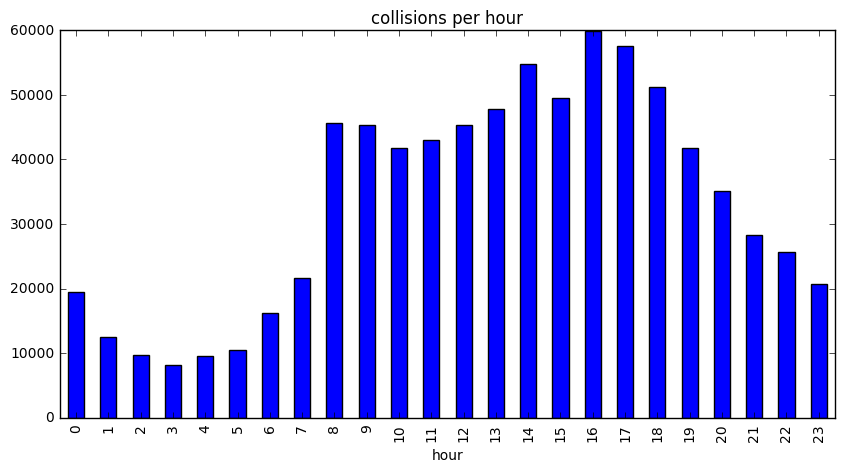

In [19]:
c_data['hour'] = c_data['TIME'].str.extract('([0-9]+)', expand=True)
hourly = c_data.groupby(['hour']).size()
hourly = hourly.reindex(index = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23'])
hourly.plot(kind='bar', title = 'collisions per hour',figsize=(10,5))
plt.show()

We can see that the most accidents happend in the afternoon between 14 and 18. This makes sense because a lot of people are getting home from work at these hours and therefore many people are driving on the roads. This also correlates with the peak we see around 8 and 9 since this is the time people are driving to work.

Discuss more:

why not 8-9 as high?

what happens at 15 since it is lower?

Do the same for weekdays??

Lets look at the same plot but for our focus factors to see if they show something similar

In [20]:
factors_hour = {}
for f in focus_factors:
    factors_hour[f]= c_data[c_data.CONTRIBUTING_FACTOR_VEHICLE_1 == f]
    factors_hour[f] = factors_hour[f].groupby(['hour']).size()
    factors_hour[f] = factors_hour[f].reindex(index = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23'])
    #factors_hour[f].plot(kind='bar', title = f)
    #plt.show()

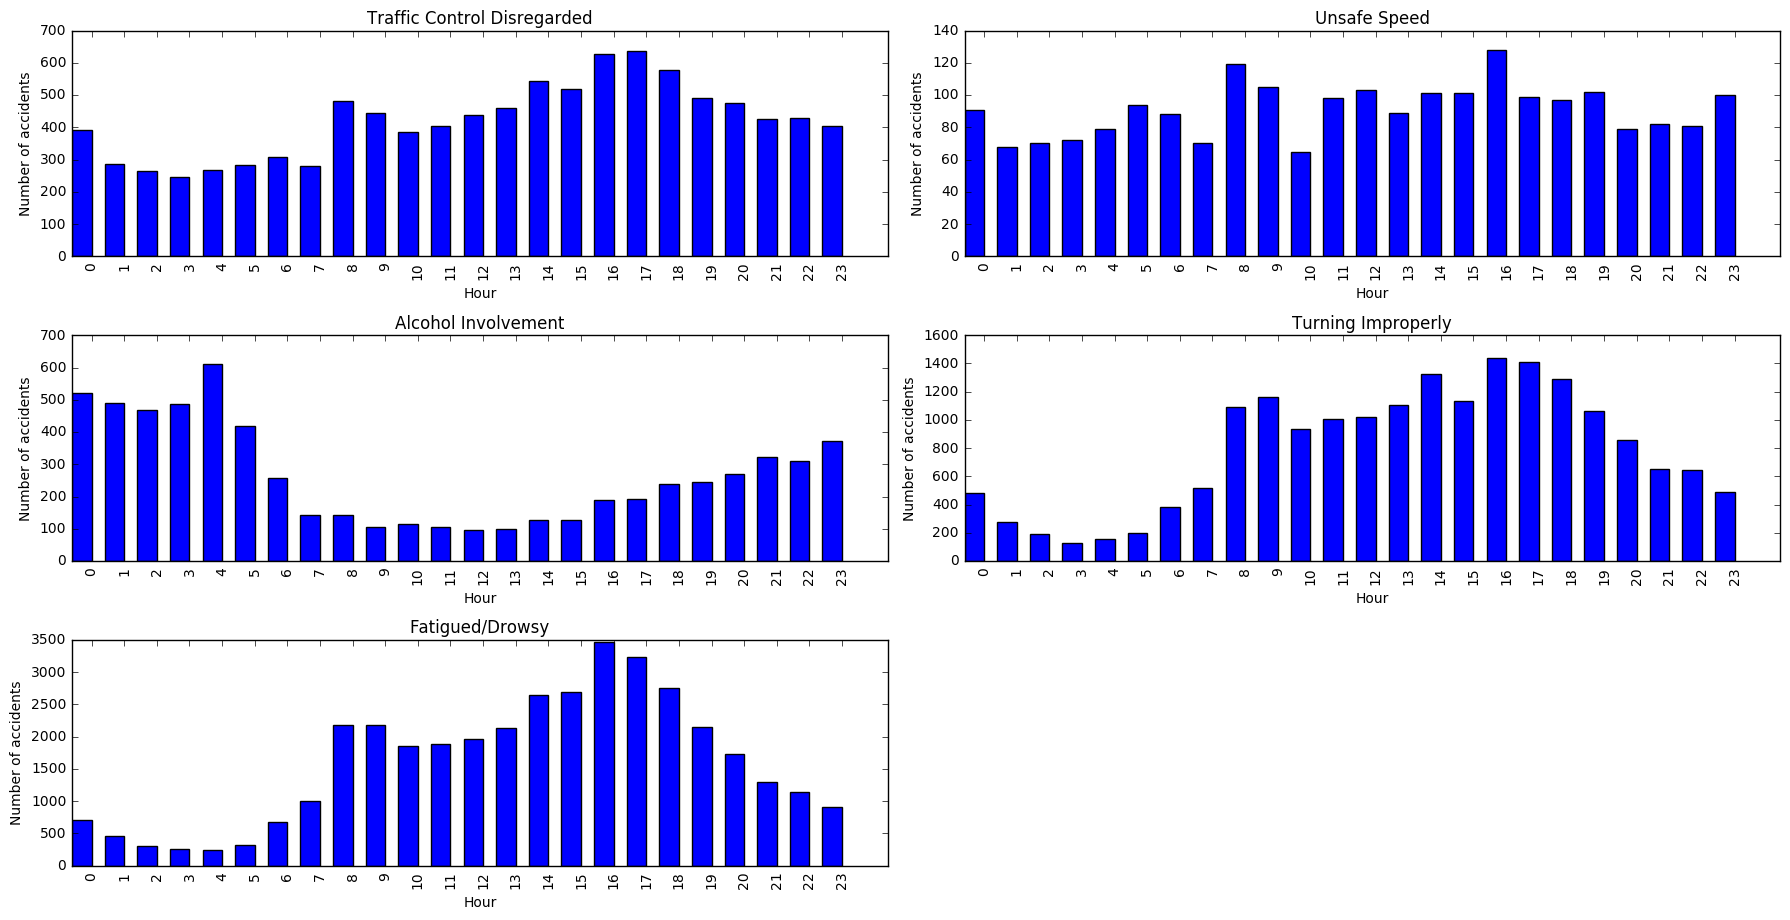

In [21]:
index = np.arange(len(factors_hour['Unsafe Speed']))
plt.figure(figsize=(18,18))
counter = 1
w = 0.6
for f in focus_factors:
    plt.subplot(6,2,counter)    
    plt.bar(index, factors_hour[f], w)
    plt.xticks(index + w,factors_hour[f].index, rotation='vertical')
    plt.title(f)
    plt.xlabel('Hour')
    plt.ylabel('Number of accidents')
    counter += 1
    plt.tight_layout(h_pad=1.0)
plt.show()

The impression we get from the focus factors match the overall impression pretty well. Nevertheless we do see differences. For alchohol involvement we see a distribution that is almost opposite from the others; It starts to increase in the evening and peaks in the early morning, during the day there are very few alchol involved accidents. Unsafe speed also looks somewhate different and seems almost random.

more on unsafe speed!!!

Another aspect to investigate is how many injuries the focus factors are responsible for. Perhaps certain type of accidents causes more injuries and should therefore be feared more. We will plot a chart for each of the factors and see the number of injured persons for them.

In [22]:
factors_injuries = c_data[c_data['CONTRIBUTING_FACTOR_VEHICLE_1'].isin(focus_factors)]
#remove injuries above 5 because they happen so rarely it wont be visible in a chart
factors_injuries = factors_injuries[(np.abs(stats.zscore(factors_injuries[['NUMBER_OF_PERSONS_INJURED']])) < 5 ).all(axis=1)]
factors_injuries = factors_injuries.groupby(['CONTRIBUTING_FACTOR_VEHICLE_1','NUMBER_OF_PERSONS_INJURED']).size()

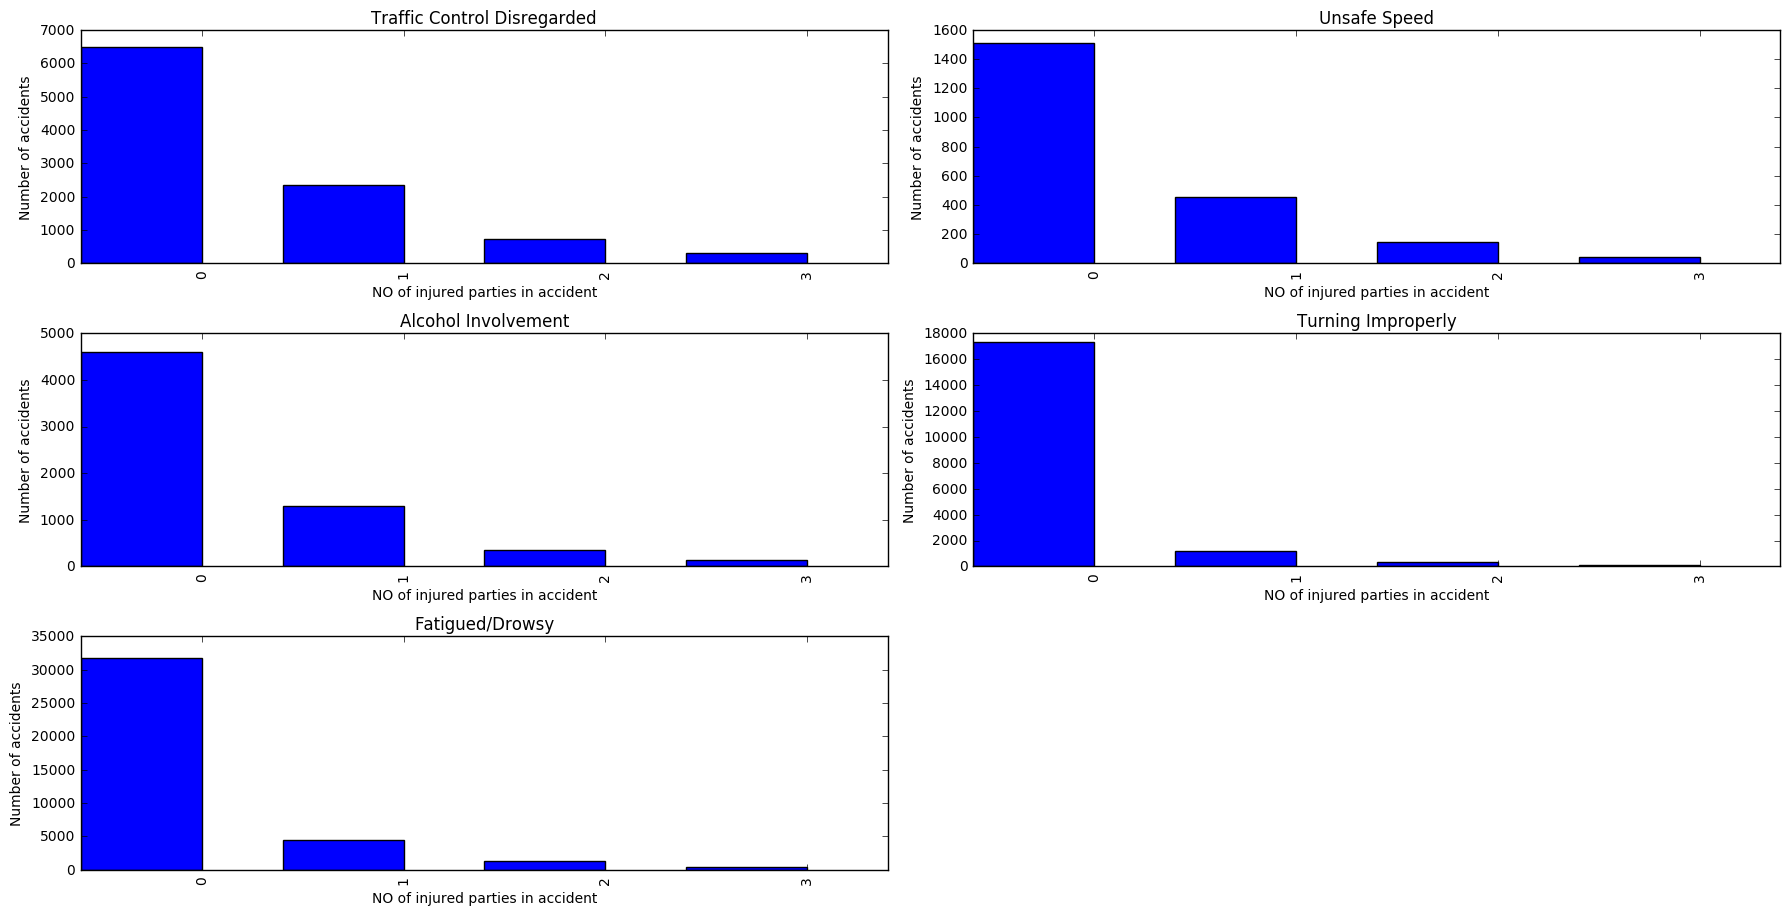

In [23]:
plt.figure(figsize=(18,18))
counter = 1
w = 0.6
for f in focus_factors:
    index = np.arange(len(factors_injuries[f]))
    plt.subplot(6,2,counter)    
    plt.bar(index, factors_injuries[f], w)
    plt.xticks(index + w,factors_injuries[f].index, rotation='vertical')
    plt.title(f)
    plt.xlabel('NO of injured parties in accident')
    plt.ylabel('Number of accidents')
    counter += 1
    plt.tight_layout(h_pad=1.0)
plt.show()

In [24]:
tot = factors_injuries['Traffic Control Disregarded'][0]+factors_injuries['Traffic Control Disregarded'][1]+factors_injuries['Traffic Control Disregarded'][2]+factors_injuries['Traffic Control Disregarded'][3]
tcd = factors_injuries['Traffic Control Disregarded'][1]+factors_injuries['Traffic Control Disregarded'][2]+factors_injuries['Traffic Control Disregarded'][3]
print 'total traffic control disregared accidents:', tot
print 'traffic control disregared accidents with injuries:', tcd
print 'percentage of traffic control disregared accidents with injuries:', tcd/tot*100

total traffic control disregared accidents: 9864
traffic control disregared accidents with injuries: 3385
percentage of traffic control disregared accidents with injuries: 34.3167072182


We see that for most of the factors there are zero injuries. However we still see a tendency to some of the factors being more dangerous. We can see that ‘turning improperly’ and ‘fatigued/drowsy’ are rather safe in the sense that hardly anyone get injured. However the remain factors have a certain degree of unsafety. If we take traffic control disregarded we see that over ⅓ of the time someone gets injured from these accidents.

Other stuff we might add here:

- VEHICLE_TYPE_CODE_1 which vehicles are most in trouble?
- Increase /decrease over the years
- Which factors results in most fatalities?
- Which streets are most dangerous


# Theory

K - means

In [29]:
def findClusters(factor):
    max_lat, min_lat = max(geo_data_focus[factor]['lat']), min(geo_data_focus[factor]['lat'])
    max_lon, min_lon = max(geo_data_focus[factor]['lon']), min(geo_data_focus[factor]['lon'])
    k_points = np.array([geo_data_focus[factor]['lon'], geo_data_focus[factor]['lat']]).T
    k_clusters = range(2,20)
    k_inertias = []
    
    for k in k_clusters:
        kmeans = cluster.KMeans(n_clusters=k)
        kmeans.fit(k_points)
        current_inertia = kmeans.inertia_
        k_inertias.append(current_inertia)
        print("K: {} = \t{}".format(k, current_inertia))
    #do I even need the polt??
    fig = plt.figure(figsize=(6,4))
    #this doesnt have to be subplot
    ax = fig.add_subplot(111)
    ax.plot(list(k_clusters), k_inertias, marker='o', linestyle='-', c='black')
    ax.set_title('Inertia as function of cluster number in K-means')
    ax.set_xlabel('Clusters')
    ax.set_ylabel('Inertia')
    plt.show()
    
def getClusters(factor, k):
    my_size = 0
    k_points = np.array([geo_data_focus[factor]['lon'], geo_data_focus[factor]['lat']]).T
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(k_points)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(111)
    x_list = []
    y_list = []
    k_list = []
    centroid_x_list = []
    centroid_y_list = []
    centroid_size = []
    for i in range(k):
        # select only data observations with cluster label == i
        ds = k_points[np.where(labels==i)]
        centroid_size.append(len(ds))
        my_size+=(len(ds))
        # plot the data observations
        ax.plot(ds[:,0],ds[:,1],'o')
        for x in range(len(ds)):
            #add lon and lat plus the cluster number to a list
            x_list.append(ds[x,0])
            y_list.append(ds[x,1])
            k_list.append(i)
        # plot the centroids
        lines = ax.plot(centroids[i,0],centroids[i,1],'kx', markersize=12, mew=2.5)
        centroid_x_list.append(centroids[i,0])
        centroid_y_list.append(centroids[i,1])
    ax.set_title(factor, fontsize=14)
    ax.set_xlabel("Longitude", fontsize = 12)
    ax.set_ylabel("Latitude", fontsize = 12)   
    plt.show()
    #now we translate this over to pandas frames
    temp_point_frame = pandas.DataFrame({'A' : []})
    temp_centroids_frame = pandas.DataFrame({'A' : []})
    xframe = pandas.Series(x_list)
    yframe = pandas.Series(y_list)
    kframe = pandas.Series(k_list)
    temp_point_frame['x'] = xframe.values
    temp_point_frame['y'] = yframe.values
    temp_point_frame['k'] = kframe.values
    temp_point_frame = temp_point_frame.drop('A', 1)
    fdp = {}
    averages_list = []
    for f in range(max(temp_point_frame.k)+1):
        fdp[f]= temp_point_frame[temp_point_frame.k == f] 
    for f in range(len(fdp)):
        fdp[f] = fdp[f][['x','y']]
    for f in range(len(fdp)):
        fdp[f] = fdp[f].values
    for f in range(len(fdp)):
        tot = 0
        for i in xrange(fdp[f].shape[0]-1):
            tot += ((((fdp[f][i+1:]-fdp[f][i])**2).sum(1))**.5).sum()
        avg = tot/((fdp[f].shape[0]-1)*(fdp[f].shape[0])/2.)
        averages_list.append(avg)

    c_x_frame = pandas.Series(centroid_x_list)
    c_y_frame = pandas.Series(centroid_y_list)
    c_size_frame = pandas.Series(centroid_size)
    avg_distance_frame = pandas.Series(averages_list)
    temp_centroids_frame['x'] = c_x_frame.values
    temp_centroids_frame['y'] = c_y_frame.values
    temp_centroids_frame['size'] = c_size_frame.values
    temp_centroids_frame['average_distance'] = avg_distance_frame.values
    temp_centroids_frame = temp_centroids_frame.drop('A', 1)
    print my_size
    return temp_point_frame, temp_centroids_frame

Traffic Control Disregarded
K: 2 = 	80.2333241903
K: 3 = 	51.3851462432
K: 4 = 	35.5735224079
K: 5 = 	24.9103191151
K: 6 = 	21.0722917638
K: 7 = 	18.0253774274
K: 8 = 	15.5338869286
K: 9 = 	13.7136249078
K: 10 = 	12.546898054
K: 11 = 	11.3759083035
K: 12 = 	10.2556557922
K: 13 = 	9.30702536392
K: 14 = 	8.6466510456
K: 15 = 	7.89449028692
K: 16 = 	7.34804894823
K: 17 = 	6.84613231389
K: 18 = 	6.40804495962
K: 19 = 	6.03272617018


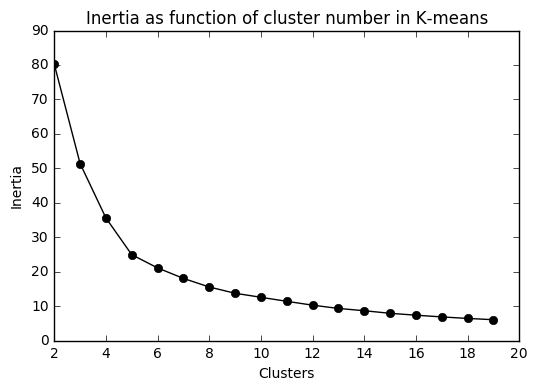

Unsafe Speed
K: 2 = 	19.8750140442
K: 3 = 	12.7493988049
K: 4 = 	7.94227429703
K: 5 = 	6.03429098028
K: 6 = 	4.98548777937
K: 7 = 	4.26646253418
K: 8 = 	3.74427032673
K: 9 = 	3.27518030194
K: 10 = 	2.93890466327
K: 11 = 	2.67000635859
K: 12 = 	2.42449593777
K: 13 = 	2.21429681835
K: 14 = 	2.06104447346
K: 15 = 	1.89442684639
K: 16 = 	1.75071645325
K: 17 = 	1.60172614962
K: 18 = 	1.5305705392
K: 19 = 	1.42741295814


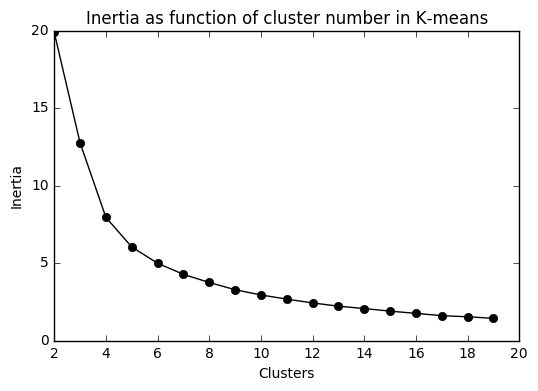

Alcohol Involvement
K: 2 = 	52.2076276798
K: 3 = 	33.4421806175
K: 4 = 	21.995299243
K: 5 = 	16.2894543593
K: 6 = 	13.3145947757
K: 7 = 	11.5325878276
K: 8 = 	10.1072914291
K: 9 = 	8.82883790187
K: 10 = 	8.00031924949
K: 11 = 	7.27090017136
K: 12 = 	6.7028908961
K: 13 = 	6.02481485382
K: 14 = 	5.55336748005
K: 15 = 	5.05480437181
K: 16 = 	4.60955249598
K: 17 = 	4.32728763181
K: 18 = 	4.06387537534
K: 19 = 	3.85618740439


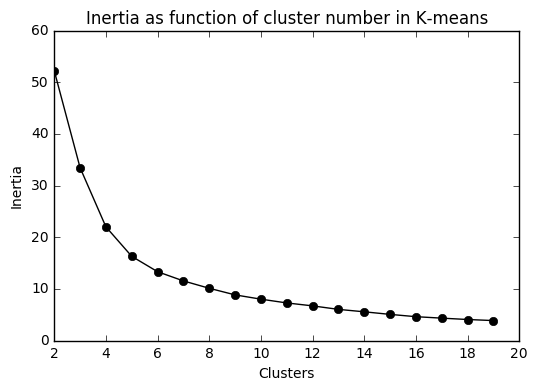

Turning Improperly
K: 2 = 	116.899822275
K: 3 = 	74.6486329598
K: 4 = 	51.25881728
K: 5 = 	36.9680956507
K: 6 = 	31.4546627439
K: 7 = 	26.3556949725
K: 8 = 	23.1512045318
K: 9 = 	20.2590453418
K: 10 = 	17.387538333
K: 11 = 	15.1144309148
K: 12 = 	13.9360809722
K: 13 = 	12.7972970285
K: 14 = 	11.7948146664
K: 15 = 	10.9874554957
K: 16 = 	10.1869253044
K: 17 = 	9.48278761137
K: 18 = 	8.93855717747
K: 19 = 	8.59649335242


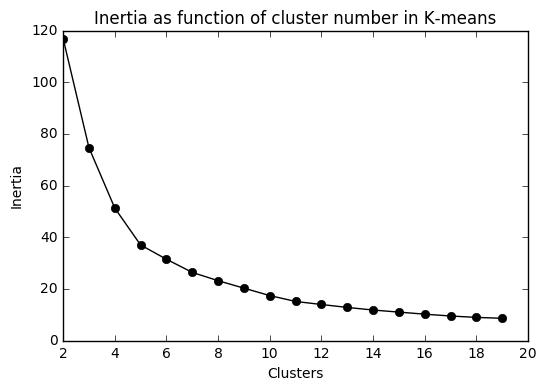

Fatigued/Drowsy
K: 2 = 	264.559900697
K: 3 = 	171.534284556
K: 4 = 	124.673585137
K: 5 = 	87.7572600877
K: 6 = 	70.4168479254
K: 7 = 	60.5167975036
K: 8 = 	52.6434380432
K: 9 = 	45.694241284
K: 10 = 	40.0845851569
K: 11 = 	35.4020766168
K: 12 = 	32.007507358
K: 13 = 	29.241748999
K: 14 = 	27.1488295578
K: 15 = 	25.2737251094
K: 16 = 	23.6972412934
K: 17 = 	22.407002904
K: 18 = 	21.0204531643
K: 19 = 	19.9428770798


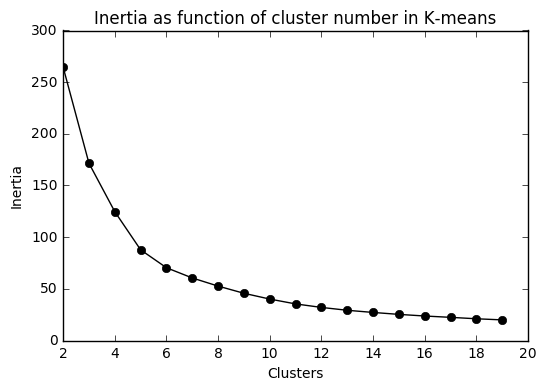

In [26]:
for f in focus_factors:
    print f
    findClusters(f)

Now choose the right number of k for creating the clusters

551
690
1243
771
478
1013
897
408
610
967
943
820
683


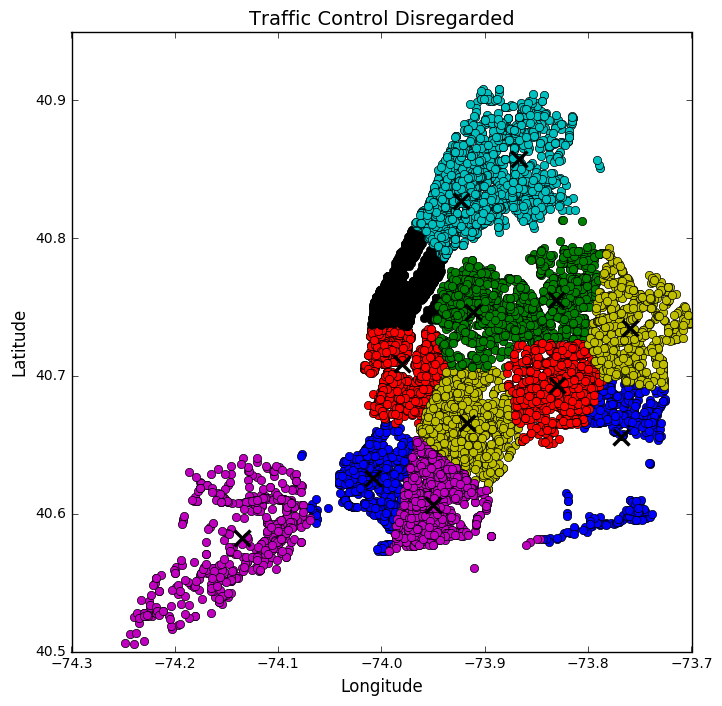

10074


In [27]:
traffic_control_disregarded_points,traffic_control_disregarded_centroids = getClusters('Traffic Control Disregarded',13)

261
254
246
59
259
211
373
231
96
191


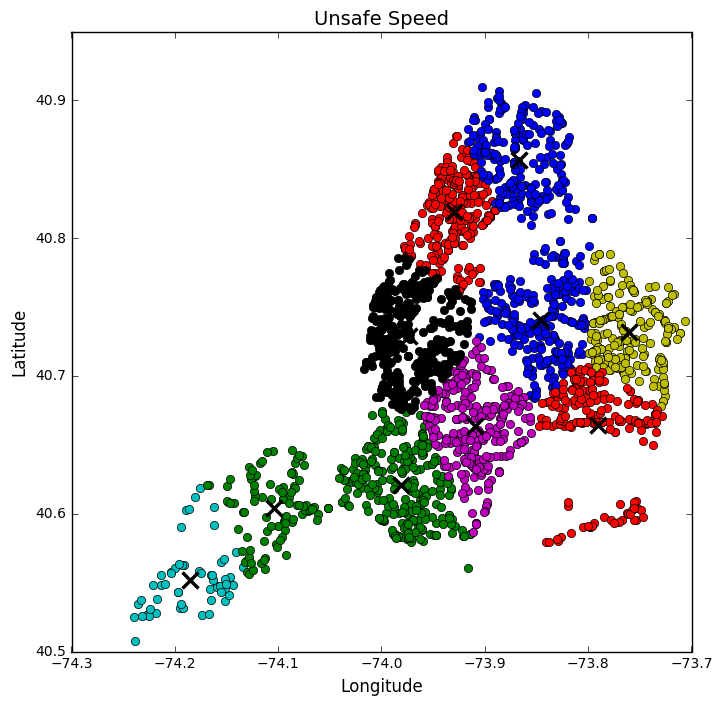

2181


In [28]:
unsafe_speed_points,unsafe_speed_centroids = getClusters('Unsafe Speed',10)

655
429
635
624
129
1077
750
840
671
408
240


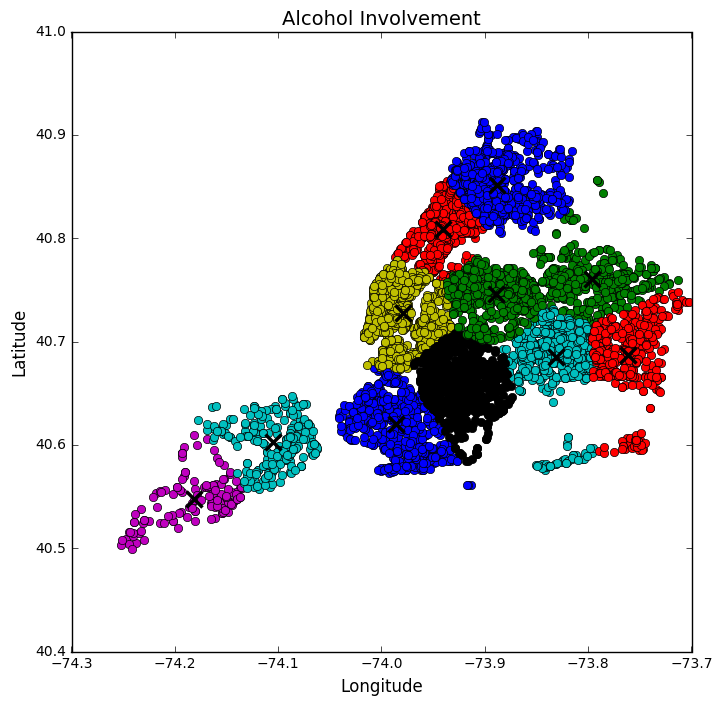

6458


In [44]:
alcohol_involvement_points,alcohol_involvement_centroids = getClusters('Alcohol Involvement',11)

1004
5234
1358
1154
2815
1822
1189
1006
1536
616
1224


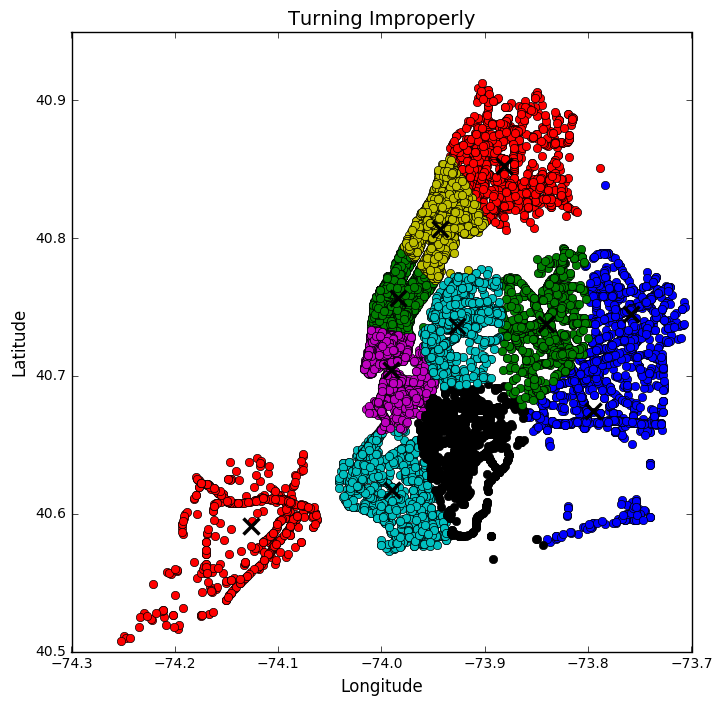

18958


In [45]:
turning_improperly_points,turning_improperly_centroids = getClusters('Turning Improperly',11)

5869
3596
1911
2619
1950
2780
2405
5325
3162
1740
4694
2168


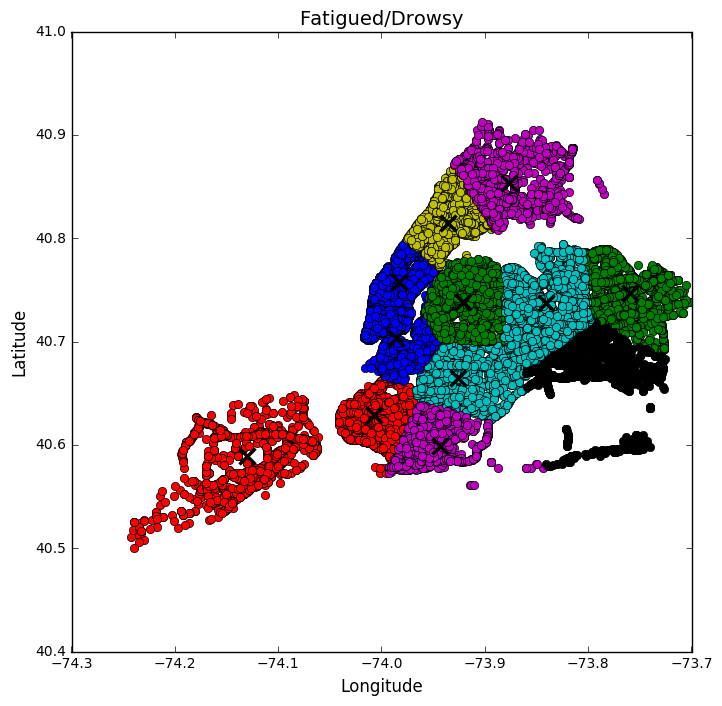

38219


In [46]:
fatigued_drowsy_points,fatigued_drowsy_centroids = getClusters('Fatigued/Drowsy',12)

# Visualizations

To show the data we have chosen to use a map as one of the main visualizations. The map then shows the data for our 5 focus factors in a few different ways. The first map gives an indication to how spread out the different factors are but also shows the user how many injuries each factor is causing. It is clear to see that they differ in how they spread out across New York and also how dangerous they are. The second map is based on K-means and is meant for the user to see significant areas where the given factor is occuring. By interpreting the circles he is also able to see how much aware he should be at the given area. A small, low opacity circle indicates an area with many of the accidents occuring close to the circle. He should therefore be alert when driving in this area. This can e.g. be seen for fatigued/drowsiness which is centralized around mid-Manhattan, lower Manhattan and the part of Brooklyn leading up to Manhattan. Alternativly we can see rather safe areas for other factors. E.g. speeding is only a slight problem on Staten Island and only on the north side. It should be noted here that the factors are relative to themselves, so …..

# Discussion

discussion points:
- sampling data and making each factor equal
- Choosing the right K for k-means

# Appendix

In [32]:
#function to create csv file with long/lat and number of injured for a specified factor
def createCSV_xy_injured(factor):
    csv_data = c_data[c_data['CONTRIBUTING_FACTOR_VEHICLE_1']==factor]
    csv_data = csv_data.ix[0:,['LONGITUDE','LATITUDE', 'NUMBER_OF_PERSONS_INJURED']]
    csv_data = csv_data[np.isfinite(c_data['LATITUDE'])]
    csv_data = csv_data[np.isfinite(c_data['NUMBER_OF_PERSONS_INJURED'])]
    #only take a sample of the data
    csv_data = csv_data.sample(n=2000)
    #change column name to be easily used in javascript
    #csv_data = csv_data.rename(columns={ 'NUMBEROF PERSONS INJURED' : 'INJURED'})
    return csv_data

In [ ]:
# create a csv file with data about location and injuries for each of the focus factors
for f in focus_factors:
    if(f != 'Fatigued/Drowsy'):
        createCSV_xy_injured(f).to_csv('xy_injured_'+f+'.csv', encoding='utf-8')
createCSV_xy_injured('Fatigued/Drowsy').to_csv('xy_injured_Fatigued_Drowsy.csv', encoding='utf-8')

In [40]:
#for the centroid data 
turning_improperly_centroids.to_csv('TI_centroids.csv', encoding='utf-8')
unsafe_speed_centroids.to_csv('US_centroids.csv', encoding='utf-8')
alcohol_involvement_centroids.to_csv('AI_centroids.csv', encoding='utf-8')
traffic_control_disregarded_centroids.to_csv('TCD_centroids.csv', encoding='utf-8')
fatigued_drowsy_centroids.to_csv('FD_centroids.csv', encoding='utf-8')